<a href="https://colab.research.google.com/github/navamshuram/In-Vehicle-Coupon-Recommendation/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
#load data
df = pd.read_csv('C:/Users/Prabhakar/Downloads/in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data 

(12684, 26)

In [ ]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#let's look at the data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [ ]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

In [ ]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

In [ ]:
df["car"].value_counts()

Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [ ]:
df.drop('car', inplace=True, axis=1)

In [ ]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

In [ ]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [ ]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [ ]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

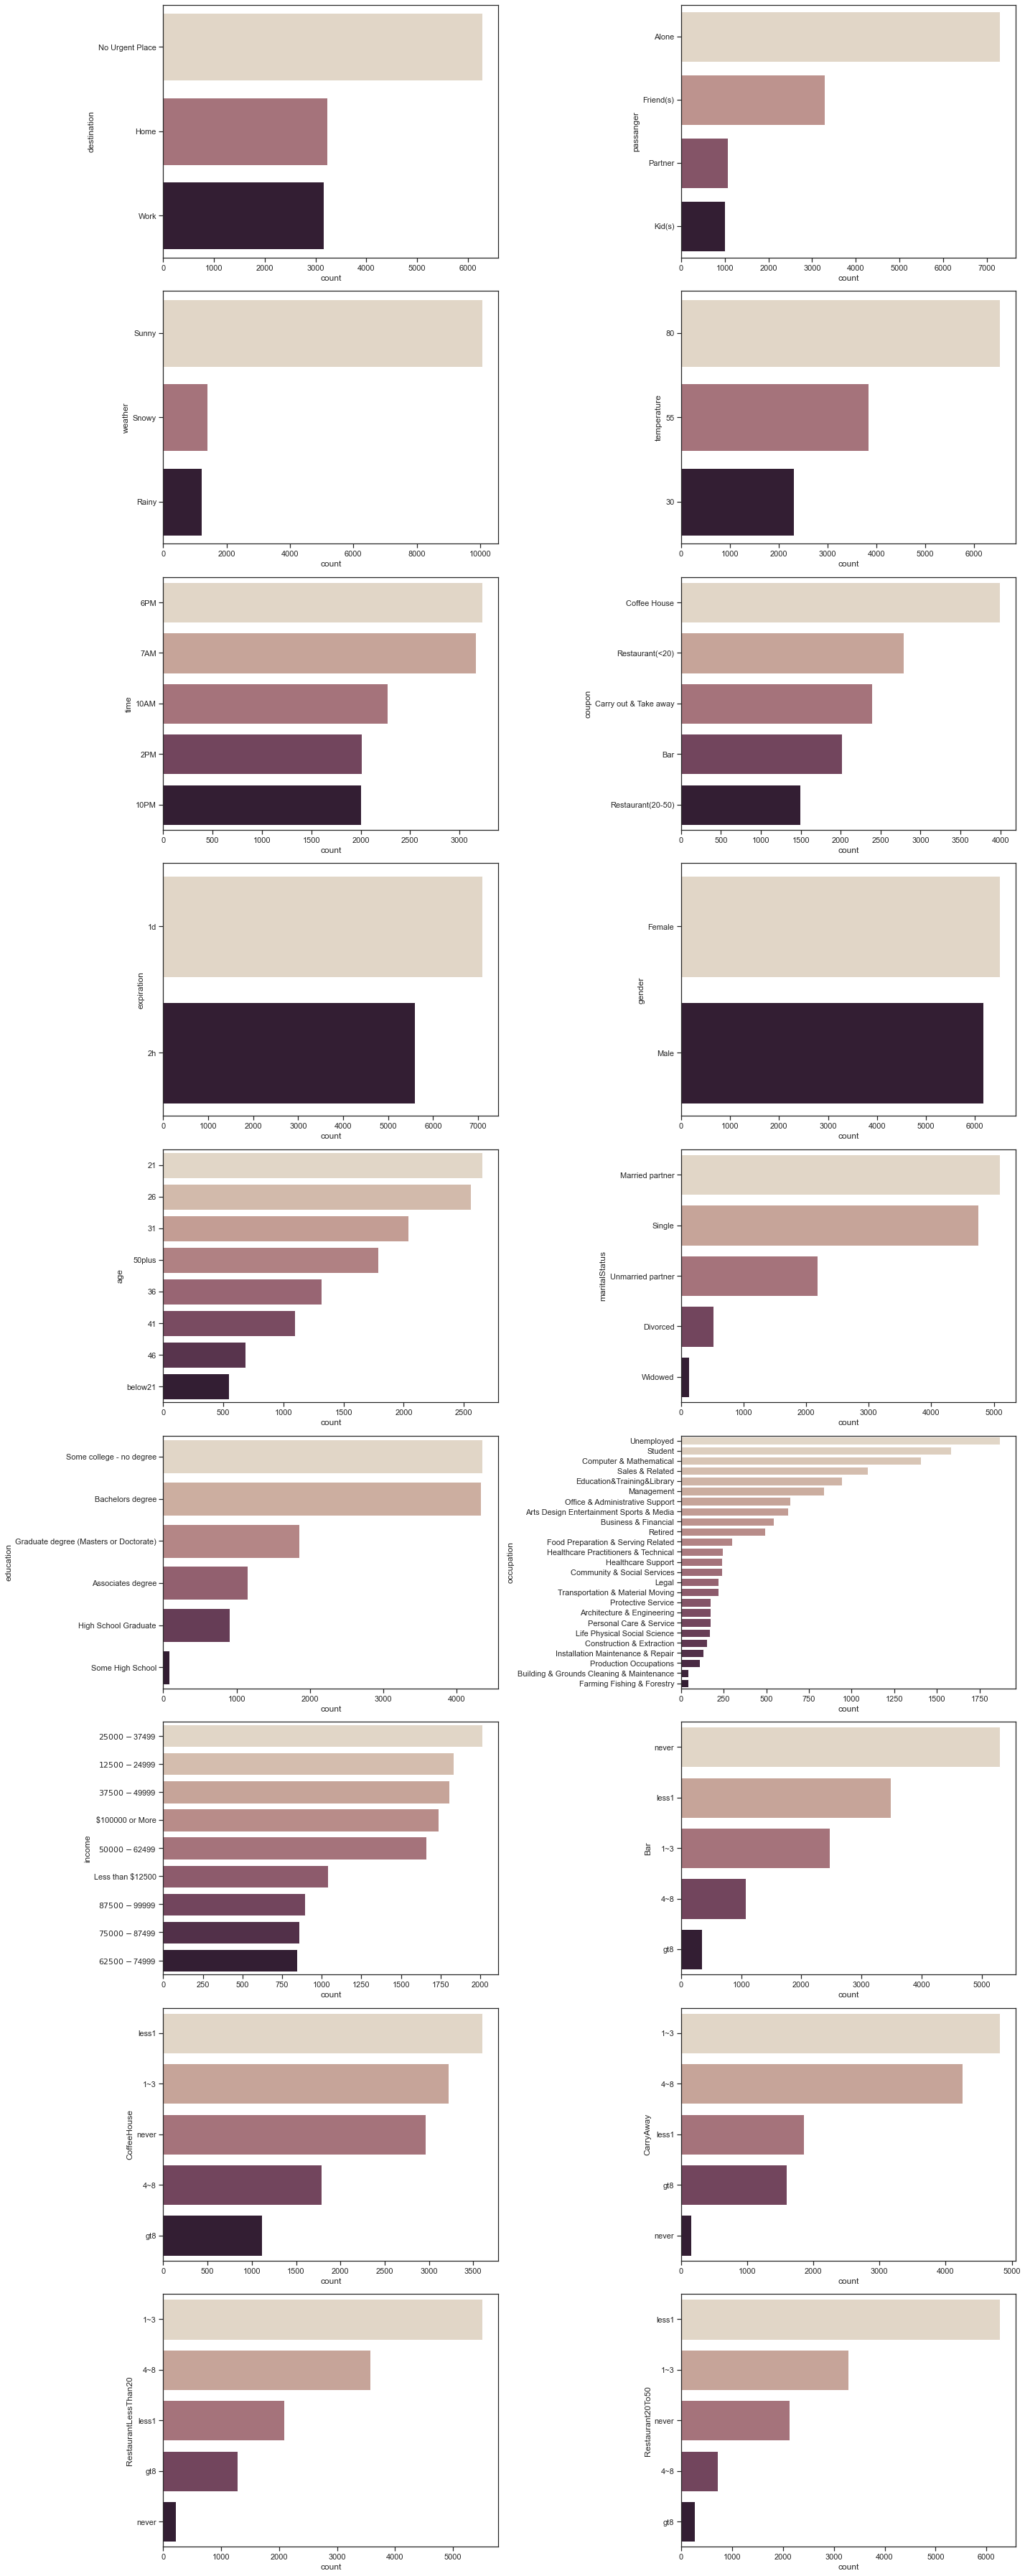

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    df_enc = pd.concat([df_enc,df0], axis=1)
    
df_final = pd.concat([df_enc, df_int], axis=1)

#source: https://pbpython.com/categorical-encoding.html

In [ ]:
df_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#split data into training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=.3, random_state=42, shuffle=True, stratify=df_final['Y'])

In [ ]:
#Creating the Dependent Feature Matrix
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

#Creating the Independent Vector
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

In [ ]:
DTC = DecisionTreeClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(X_test)

print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1643
           1       0.73      0.74      0.74      2163

    accuracy                           0.70      3806
   macro avg       0.69      0.69      0.69      3806
weighted avg       0.70      0.70      0.70      3806



In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

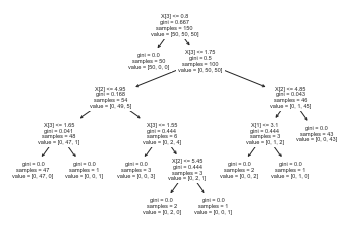

In [ ]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)